# Sentiment Analysis of Spotify App Review using VADER, Textblob, AFINN and Transformers


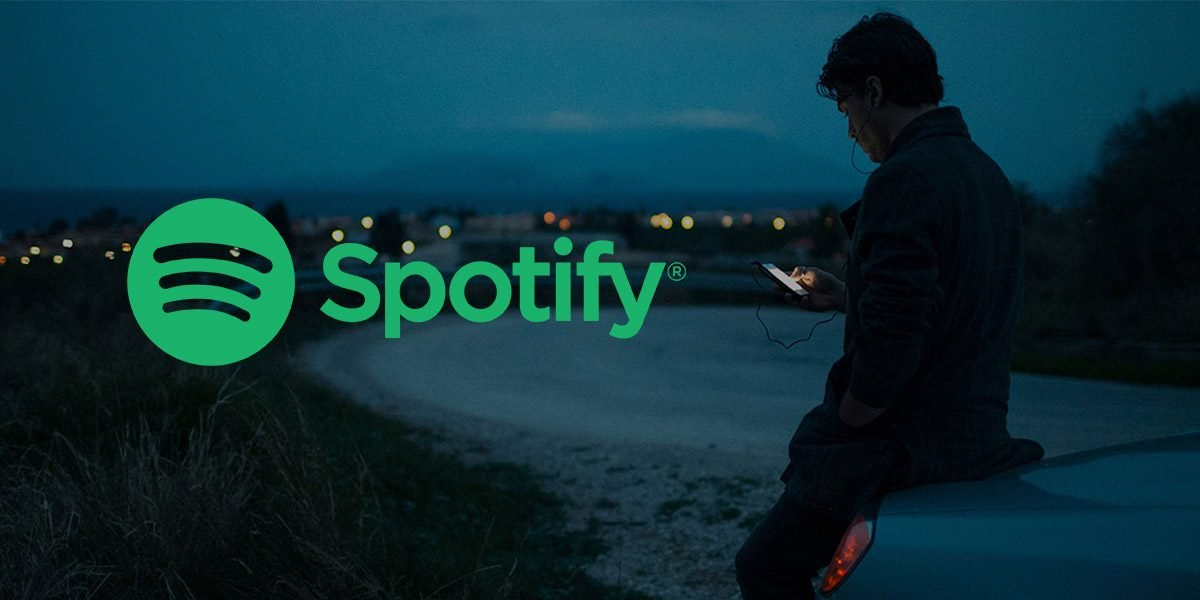

***

## Few installations

In [1]:
!pip install contractions textblob wordcloud afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.5 MB/s eta 0:00:00
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=506a85656b537d52d9a2253ba771e59af32da814935073fe4b60242436a61d4f
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [2]:
!pip install transformers -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 29.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.1
    Uninstalling transformers-4.41.1:
      Successfully uninstalled transformers-4.41.1


In [3]:
import nltk
nltk.download('all')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import nltk
import re
import contractions
import spacy
nlp = spacy.load('en_core_web_sm')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from afinn import Afinn

## Reading the dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data=pd.read_csv('/content/drive/MyDrive/Sentiment analysis/reviews.csv')
data.head(3)

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN


In [10]:
data=data[['Review','Rating']]
data

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  61594 non-null  object
 1   Rating  61594 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 962.5+ KB


In [12]:
data.nunique()

Review    61356
Rating        5
dtype: int64

In [13]:
sorted(data.Rating.unique())

[1, 2, 3, 4, 5]

## Data Preprocessing

In [14]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [15]:
data.duplicated().sum()

201

In [16]:
data=data.drop_duplicates()
data

,Review,Rating
0,"Great music service, the audio is high quality...",5
1,Please ignore previous negative rating. This a...,5
2,"This pop-up ""Get the best Spotify experience o...",4
3,Really buggy and terrible to use as of recently,1
4,Dear Spotify why do I get songs that I didn't ...,1
...,...,...
61589,Even though it was communicated that lyrics fe...,1
61590,"Use to be sooo good back when I had it, and wh...",1
61591,This app would be good if not for it taking ov...,2
61592,The app is good hard to navigate and won't jus...,2


In [17]:
def text_preprocessing(text):
  #lowercasing
  text=text.lower()
  #expanding contractions
  text=contractions.fix(text)
  #removing punctuations
  text=re.sub('[^a-zA-Z\d\s]','',text)
  #removing stopwords
  text=" ".join([wrd for wrd in text.split() if wrd not in stopwords])
  #spelling correction
  #text=TextBlob(text).correct()
  #lemmatization
  text=" ".join([lemma.lemmatize(wrd) for wrd in text.split()])
  return text

In [18]:
data.Review=[text_preprocessing(sen) for sen in data.Review]

In [19]:
data

,Review,Rating
0,great music service audio high quality app eas...,5
1,please ignore previous negative rating app sup...,5
2,popup get best spotify experience android 12 a...,4
3,really buggy terrible use recently,1
4,dear spotify get song put playlist shuffle play,1
...,...,...
61589,even though communicated lyric feature availab...,1
61590,use sooo good back downloaded free version cou...,1
61591,app would good taking device start comp spotif...,2
61592,app good hard navigate let play song click pla...,2


## Data Visualization

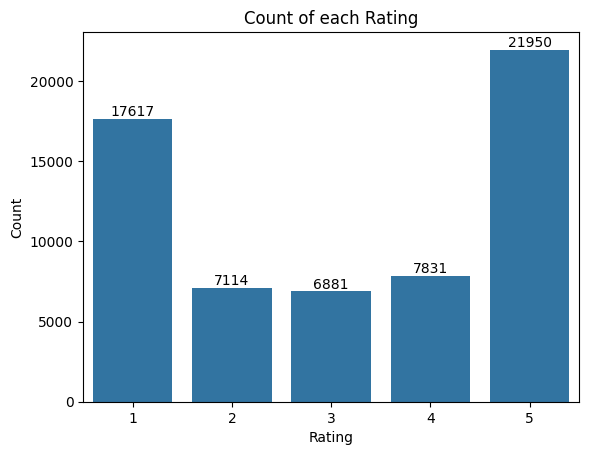

In [20]:
rate=data.Rating.value_counts()
ax=sns.barplot(x=rate.index,y=rate.values)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of each Rating')
plt.show()

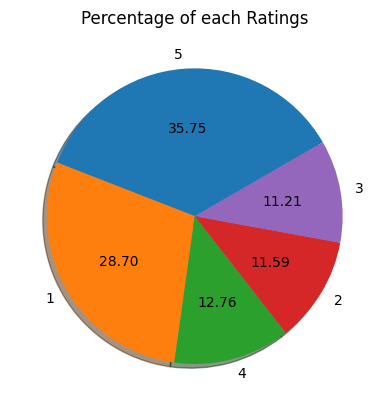

In [21]:
plt.pie(x=data.Rating.value_counts(),autopct="%.2f",labels=data.Rating.value_counts().index,startangle=30,
       shadow=True)
plt.title('Percentage of each Ratings')
plt.show()

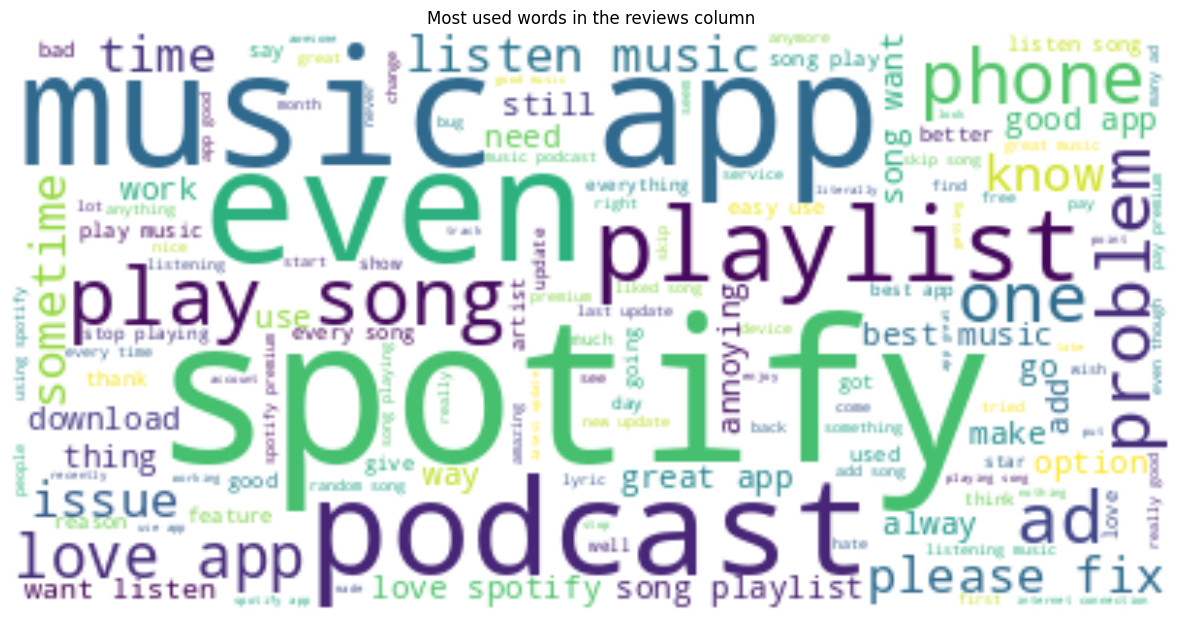

In [22]:
text=" ".join([sen for sen in data.Review])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most used words in the reviews column')
plt.axis('off')
plt.show()

## Sentiment Analysis and Prediction
- ### using VADER

In [23]:
vader_df=data.copy()
vader_df.head()

,Review,Rating
0,great music service audio high quality app eas...,5
1,please ignore previous negative rating app sup...,5
2,popup get best spotify experience android 12 a...,4
3,really buggy terrible use recently,1
4,dear spotify get song put playlist shuffle play,1


In [24]:
sentiments = SentimentIntensityAnalyzer()

In [25]:
vader_df.Review[8]

'great app best mp3 music app ever used one problem cannot play song find song despite app wonderful recommend best'

In [26]:
sentiments.polarity_scores(vader_df.Review[8])

{'neg': 0.279, 'neu': 0.368, 'pos': 0.354, 'compound': 0.6864}

In [27]:
vader_df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in vader_df["Review"]]
vader_df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in vader_df["Review"]]
vader_df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in vader_df["Review"]]
vader_df['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in vader_df["Review"]]

In [28]:
vader_df

,Review,Rating,Positive,Negative,Neutral,Compound
0,great music service audio high quality app eas...,5,0.589,0.000,0.411,0.9169
1,please ignore previous negative rating app sup...,5,0.458,0.276,0.267,0.6249
2,popup get best spotify experience android 12 a...,4,0.357,0.148,0.495,0.5859
3,really buggy terrible use recently,1,0.000,0.458,0.542,-0.5233
4,dear spotify get song put playlist shuffle play,1,0.455,0.000,0.545,0.6124
...,...,...,...,...,...,...
61589,even though communicated lyric feature availab...,1,0.084,0.110,0.806,-0.1779
61590,use sooo good back downloaded free version cou...,1,0.379,0.151,0.470,0.8810
61591,app would good taking device start comp spotif...,2,0.157,0.293,0.551,-0.7854
61592,app good hard navigate let play song click pla...,2,0.331,0.046,0.623,0.8271


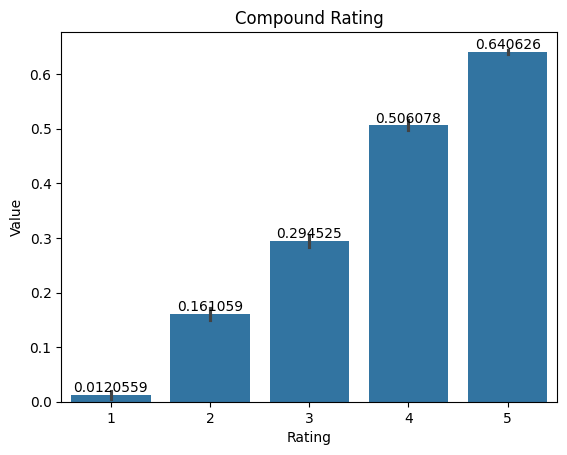

In [29]:
ax=sns.barplot(x=vader_df.Rating, y=vader_df.Compound)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Compound Rating')
plt.ylabel('Value')
plt.show()

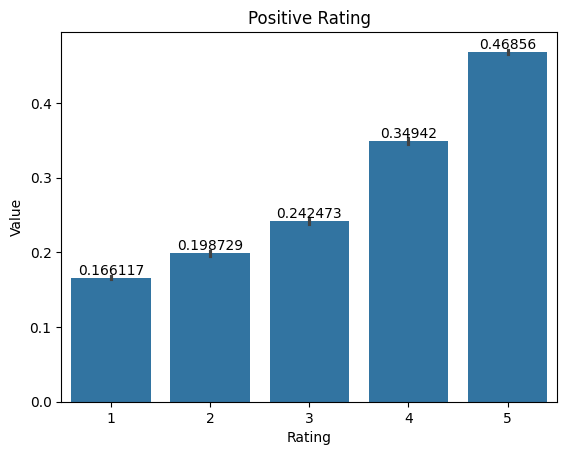

In [30]:
ax=sns.barplot(x=vader_df.Rating, y=vader_df.Positive)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Positive Rating')
plt.ylabel('Value')
plt.show()

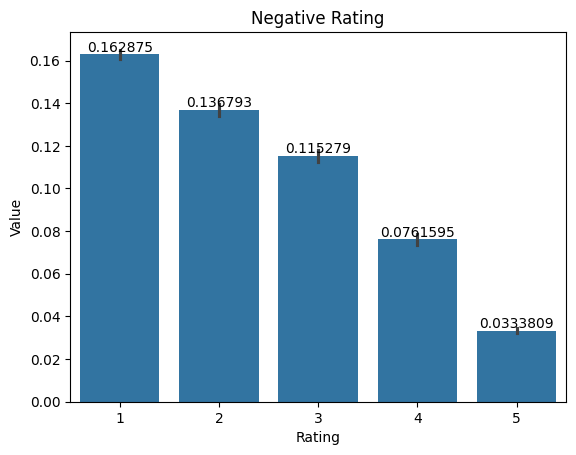

In [31]:
ax=sns.barplot(x=vader_df.Rating, y=vader_df.Negative)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Negative Rating')
plt.ylabel('Value')
plt.show()

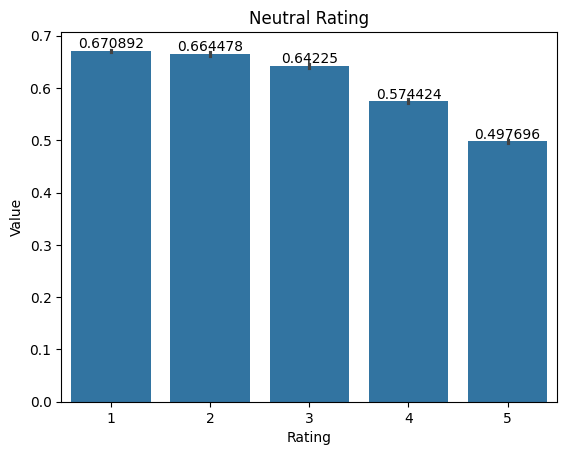

In [32]:
ax=sns.barplot(x=vader_df.Rating, y=vader_df.Neutral)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Neutral Rating')
plt.ylabel('Value')
plt.show()

In [33]:
def senti_score(a,b,c):
    if max([a,b,c])==a:
        return ("Positive")
    elif max([a,b,c])==b:
        return "Negative"
    else:
        return "Neutral"

In [34]:
x = sum(vader_df["Positive"])
y = sum(vader_df["Negative"])
z = sum(vader_df["Neutral"])
print("Positive Sentiment score: ", x)
print("Negative Sentiment score: ", y)
print("Neutral Sentiment score: ", z)
print("Overall Sentiment score : ", senti_score(x,y,z))

Positive Sentiment score:  19029.905999999693
Negative Sentiment score:  5964.870000000011
Neutral Sentiment score:  36388.26300000077
Overall Sentiment score :  Neutral


_So, most people gave Neutral reviews, and a small proportion of people give Negative reviews. So we can say that people are satisfied with the Spotify App._

In [35]:
# Predictions

def senti_pred(sen):
    d=sentiments.polarity_scores(sen)
    del d['compound']
    if max(d, key=lambda key: d[key])=='pos':
        return f'POSITIVE!!! Polarity_Score = {d["pos"]}'
    elif max(d, key=lambda key: d[key])=='neg':
        return f'NEGATIVE!!! Polarity_Score = {d["neg"]}'
    else:
        return f'NEUTRAL!!! Polarity_Score = {d["neu"]}'

In [36]:
senti_pred('I hate sentiment analysis but also love it!')

'POSITIVE!!! Polarity_Score = 0.453'

- ### using TextBlob

In [37]:
text_blob_df = data.copy()
text_blob_df.Review[8]

'great app best mp3 music app ever used one problem cannot play song find song despite app wonderful recommend best'

In [38]:
TextBlob(text_blob_df.Review[8]).sentiment

Sentiment(polarity=0.95, subjectivity=0.5874999999999999)

In [39]:
TextBlob(text_blob_df.Review[8]).sentiment.polarity

0.95

In [40]:
def senti_cal(polarityScore):
    if polarityScore>0:
        return 'POSITIVE'
    elif polarityScore<0:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

senti_cal(TextBlob(text_blob_df.Review[8]).sentiment.polarity)

'POSITIVE'

In [41]:
text_blob_df['Polarity_Score']=text_blob_df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
text_blob_df['sentiment']=text_blob_df['Polarity_Score'].apply(lambda x: senti_cal(x))

In [42]:
text_blob_df.head()

,Review,Rating,Polarity_Score,sentiment
0,great music service audio high quality app eas...,5,0.420333,POSITIVE
1,please ignore previous negative rating app sup...,5,0.166667,POSITIVE
2,popup get best spotify experience android 12 a...,4,0.100000,POSITIVE
3,really buggy terrible use recently,1,-0.266667,NEGATIVE
4,dear spotify get song put playlist shuffle play,1,0.000000,NEUTRAL


In [43]:
# Count of sentiments
text_blob_df.sentiment.value_counts()

sentiment
POSITIVE    40543
NEGATIVE    12927
NEUTRAL      7923
Name: count, dtype: int64

In [44]:
print("Overall Positive Score: ", text_blob_df[text_blob_df.sentiment=='POSITIVE'].Polarity_Score.mean())
print("Overall Negative Score: ", text_blob_df[text_blob_df.sentiment=='NEGATIVE'].Polarity_Score.mean())
print("Overall Neutral Score: ", text_blob_df[text_blob_df.sentiment=='NEUTRAL'].Polarity_Score.mean())

Overall Positive Score:  0.40394436352588237
Overall Negative Score:  -0.270410171697436
Overall Neutral Score:  0.0


In [45]:
# Overall Polarity Score
np.mean(text_blob_df['Polarity_Score']), senti_cal(np.mean(text_blob_df['Polarity_Score']))

(0.2098207294137294, 'POSITIVE')

_So, most people gave Positive reviews, and nearly 21% people gave Negative reviews. So we can say that people are happy with the Spotify App._

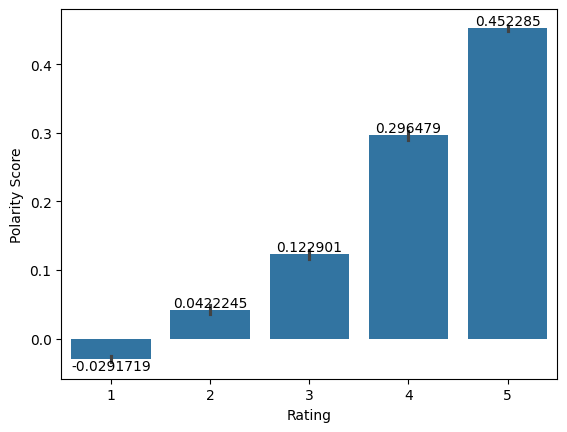

In [46]:
ax = sns.barplot(x=text_blob_df.Rating, y=text_blob_df.Polarity_Score)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Polarity Score')
plt.show()

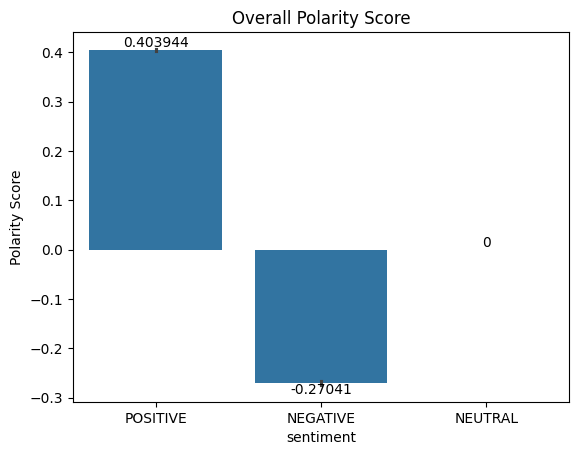

In [47]:
ax = sns.barplot(x=text_blob_df.sentiment, y=text_blob_df.Polarity_Score)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Polarity Score')
plt.title("Overall Polarity Score")
plt.show()

In [48]:
# Prediction

def senti_textblob(sen):
    blob=TextBlob(sen)
    polarity=blob.sentiment.polarity
    if polarity>0:
        return f'POSITIVE!!! Polarity_Score = {polarity}'
    elif polarity<0:
        return f'NEGATIVE!!! Polarity_Score = {polarity}'
    else:
        return f'NEUTRAL!!! Polarity_Score = {polarity}'

In [49]:
senti_textblob('I hate sentiment analysis but also love it!')

'NEGATIVE!!! Polarity_Score = -0.08750000000000002'

- ### using AFINN

In [50]:
afinn = Afinn(emoticons=True, language = 'en')

In [51]:
afinn_df = data.copy()
afinn_df.Review[8]

'great app best mp3 music app ever used one problem cannot play song find song despite app wonderful recommend best'

In [52]:
# overall
afinn.score(afinn_df.Review[8])

13.0

In [53]:
def senti_cal_afinn(score):
    if score>0:
        return 'POSITIVE'
    elif score<0:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

senti_cal_afinn(afinn.score(afinn_df.Review[8]))

'POSITIVE'

In [54]:
afinn_df['Sentiment_Score']=afinn_df['Review'].apply(lambda x: afinn.score(x))
afinn_df['Sentiment']=afinn_df['Sentiment_Score'].apply(lambda x: senti_cal_afinn(x))

In [55]:
afinn_df.head()

,Review,Rating,Sentiment_Score,Sentiment
0,great music service audio high quality app eas...,5,10.0,POSITIVE
1,please ignore previous negative rating app sup...,5,4.0,POSITIVE
2,popup get best spotify experience android 12 a...,4,2.0,POSITIVE
3,really buggy terrible use recently,1,-3.0,NEGATIVE
4,dear spotify get song put playlist shuffle play,1,2.0,POSITIVE


In [56]:
# Count of Sentiments
afinn_df.Sentiment.value_counts()

Sentiment
POSITIVE    38534
NEGATIVE    14517
NEUTRAL      8342
Name: count, dtype: int64

In [57]:
print("Overall Positive Score: ", afinn_df[afinn_df.Sentiment=='POSITIVE'].Sentiment_Score.mean())
print("Overall Negative Score: ", afinn_df[afinn_df.Sentiment=='NEGATIVE'].Sentiment_Score.mean())
print("Overall Neutral Score: ", afinn_df[afinn_df.Sentiment=='NEUTRAL'].Sentiment_Score.mean())

Overall Positive Score:  4.611771422639746
Overall Negative Score:  -2.964455466005373
Overall Neutral Score:  0.0


In [58]:
# Overall Score
np.mean(afinn_df['Sentiment_Score']), senti_cal(np.mean(afinn_df['Sentiment_Score']))

(2.193653999641653, 'POSITIVE')

_So, most people gave Positive reviews, and nearly 23% of people gave Negative reviews. So we can say that overall people are happy with the Spotify App._

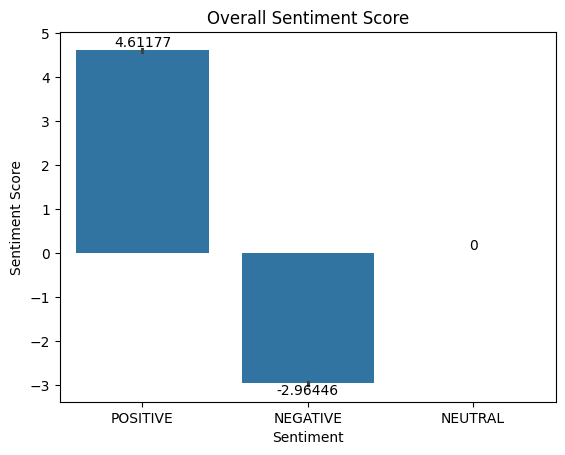

In [59]:
ax = sns.barplot(x=afinn_df.Sentiment, y=afinn_df.Sentiment_Score)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Sentiment Score')
plt.title("Overall Sentiment Score")
plt.show()

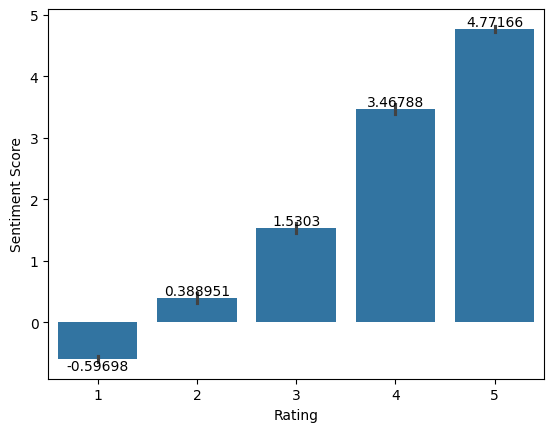

In [60]:
ax = sns.barplot(x=afinn_df.Rating, y=afinn_df.Sentiment_Score)
for i in ax.containers:
    ax.bar_label(i)
plt.ylabel('Sentiment Score')
plt.show()

In [61]:
# Prediction

def senti_afinn(sen):
    senti_score=afinn.score(sen)
    if senti_score>0:
        return f'POSITIVE!!! Sentiment_Score = {senti_score}'
    elif senti_score<0:
        return f'NEGATIVE!!! Sentiment_Score = {senti_score}'
    else:
        return f'NEUTRAL!!! Sentiment_Score = {senti_score}'

In [62]:
senti_afinn('I hate sentiment analysis but also love it!')

'NEUTRAL!!! Sentiment_Score = 0.0'

- ### using Transformers Pipeline

In [63]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [64]:
sent_pipeline('I hate sentiment analysis but also love it!')

[{'label': 'negative', 'score': 0.502941906452179}]